# 2.29. Weibull: Median, quartile difference

In [5]:
alpha <- 2
beta <- 1
m <- 1e5

medX = beta*.6931^(1/alpha)
qdX = beta*(1.3863^(1/alpha) - .2877^(1/alpha))

X = beta*rexp(m)^(1/alpha) # Weibull function of exp dist

X = sort(X)
simulatedMedian = X[.5 * m]
simulatedQd = X[.75*m] - X[.25*m]

c('medX analytical', medX, 'medX simulated', simulatedMedian, 'qdX analytic', qdX, 'qdX simulated', simulatedQd)

[1] "medX analytical"   "0.832526275861609" "medX simulated"   
[4] "0.834205750802178" "qdX analytic"      "0.641035683848787"
[7] "qdX simulated"     "0.645107908022324"

Good correspondence simulated and analytical.

# 2.32. Loss property insurance. Logistic.

In [6]:
alpha <- 2
beta <- 1
m <- 1e5

medianAnalytic = .916
quartileDifferenceAnalytic = 1.299

U = runif(m)
X = beta*log((1 + U/alpha)/(1 - U))

X = sort(X)
medianMC = X[.5 *m]
quartileDifferenceMC = X[.75*m] - X[.25*m]

c('Median MC/analytic', medianMC/medianAnalytic, 'Qdiff MC/analytic', quartileDifferenceMC/quartileDifferenceAnalytic)

[1] "Median MC/analytic" "1.00235629532677"   "Qdiff MC/analytic" 
[4] "1.00023727599539"

MC fits very well.
# 7.9. -log-likelihood of Pareto
Checking how well the ll estimator estimates the parameters for a Pareto distribution when the random variable are drawn randomly from a Pareto distribution with known parameters. How well does the estimated parameters fit the known parameters?

In [22]:
# First: how to construct a basic function in R:
tstFunction = function(a,b){
    c = a+b
    d = 2*c
    #return c
}

# Testing the function
a = 1
b = 2
result = tstFunction(a,b)
c(result)
# It is the last calculation that is returned (d in this case)

[1] 6

In [41]:
# See p 239 for expression
llminus = function(beta, z){
    alphaHat = 1/mean(log(1 + z/beta))
    -log(alphaHat/beta) + (1 + a/alphaHat)
}

alpha = 4
beta = 1
mb = 10
ns = c(1e2, 1e3, 1e4)

estimateParetoParameters = function(mb, n){
    cat('\n n: ', n, '\n')
    #print(c('\n ', n))
    for (i in 1:mb){
        z = beta*(runif(n)**(-1/alpha) - 1) # Pareto distribution
        o = optimize(llminus, c(.001, 1000), z = z) # Localizing maximum of LL function
        betaHat = o[[1]]
        alphaHat = 1/mean(log(1 + z/betaHat))
        print(c(alphaHat, betaHat))
    }
}

for (n in ns){
    estimateParetoParameters(mb, n)
}


 n:  100 
[1] 7.774347 1.869171
[1] 13.467832  4.800365
[1] 7.276391 2.368249
[1] 3.1080095 0.7614932
[1] 6.177131 1.703828
[1] 5.599404 1.481840
[1] 11.444051  4.008011
[1] 4.935728 1.142442
[1] 206.02611  54.20087
[1] 4.863241 1.115101

 n:  1000 
[1] 4.243933 1.100970
[1] 3.4196671 0.7963099
[1] 3.5174031 0.8308205
[1] 4.572542 1.205080
[1] 3.405974 0.812920
[1] 4.724548 1.407597
[1] 5.132685 1.289023
[1] 4.591813 1.145002
[1] 4.915698 1.298369
[1] 3.7046427 0.8707295

 n:  10000 
[1] 3.992348 1.026463
[1] 4.200977 1.058326
[1] 4.088582 1.023819
[1] 3.8759690 0.9643478
[1] 4.046530 1.003666
[1] 4.271360 1.076791
[1] 4.160292 1.038469
[1] 4.015874 1.002783
[1] 3.8357574 0.9615519
[1] 3.899154 0.974758


Accuracy becomes good for large $n$.

# 7.11. Weibull and ML. 

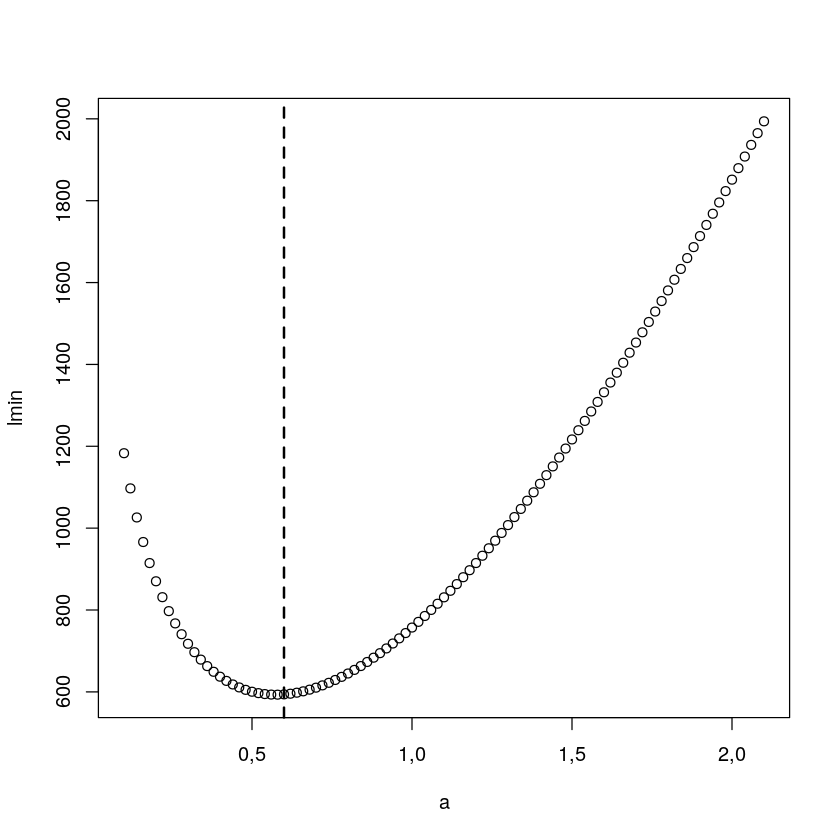

In [49]:
alpha = .6
beta = 1
n = 500

llminus = function(alpha, z){
    betaHat = mean(z**alpha)**(1/alpha)
    -sum(dweibull(z, alpha, betaHat, log=T)) # I think this is the low LL with optimal beta
}

z = rweibull(n, alpha, beta)
a1 = .1
a2 = 2.1
a = a1 + 0:100*(a2-a1)*.01
lmin = a
for (i in 1:101){
    lmin[i] = llminus(a[i], z)
}
plot(a, lmin)
abline(v = alpha, lty=2, lwd=2)

We see that the minimum $\alpha$ is close to the true minimum.

In [58]:
# alpha and beta by identification of minimum in above figure

o = optimize(llminus, c(.001, 50), z = z)
aHat = o[[1]]
betaHat = mean(z**aHat)**(1/aHat)
c('aHat/alpha', aHat/alpha, 'bHat/beta', betaHat/beta)


[1] "aHat/alpha"        "0,957893694479897" "bHat/beta"        
[4] "1,07492155469405"

Good fit.<br>
__Relation to previous exercise:__ <br>
Here we only draw one sample, while in ex 7.9 we drew 10. However, ex 7.9 showed that when n in the MC sims are high, the results converge over the samples, so only one sample is necessary.